In [124]:
import importlib
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

import pandas as pd

from scipy import stats

import plotly.graph_objects as ptly
import plotly.express as px

import waldluft as wl

plt.style.use("janjo-v0-0.mplstyle")


Bad key xtick.labelcolor in file janjo-v0-0.mplstyle, line 77 ('xtick.labelcolor: k')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key ytick.labelcolor in file janjo-v0-0.mplstyle, line 88 ('ytick.labelcolor: k')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [158]:
importlib.reload(wl)

<module 'waldluft' from '/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py'>

In [159]:
inst = wl.Timed("raw_data", encoding="iso8859-1")

Successfully imported the following sensor data:
    WTDL:
        W6
        W7
        W5
        W4
        W1
        W3
        W2
        W9
        W8
    SHT:
        S1  98:2B
        S3  A5:6D
        S2  B1:5B
        S7  79:D0
        S9  CD:A2
        S8  E1:E1


In [97]:
inst.plot_temp_time_interactive("W6", "W7", "W8", "W9")

28.154175000000002
image was saved at graphics_report/Ermittlung_Tages-Referenztemperatur_W6W7W8W9_size-8-5.pdf
image was saved at graphics_report/Ermittlung_Tages-Referenztemperatur_W6W7W8W9_size-8-5.png


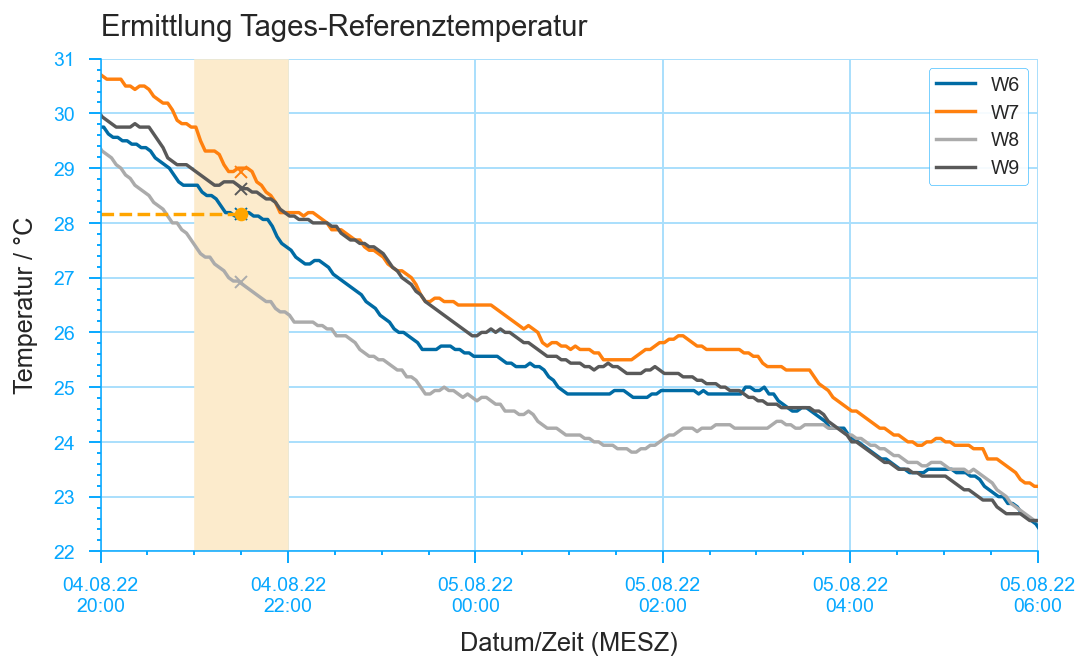

In [163]:
# Grafik 1: Ermittlung Tages-Referenztemperatur

# xrange: 20-6 => 10h

means_1 = (
    inst.timeseries["W6"].loc[dt.datetime(2022,8,4,21):dt.datetime(2022,8,4,22), "T"].mean(),
    inst.timeseries["W7"].loc[dt.datetime(2022,8,4,21):dt.datetime(2022,8,4,22), "T"].mean(),
    inst.timeseries["W8"].loc[dt.datetime(2022,8,4,21):dt.datetime(2022,8,4,22), "T"].mean(),
    inst.timeseries["W9"].loc[dt.datetime(2022,8,4,21):dt.datetime(2022,8,4,22), "T"].mean(),
)
mean_1 = sum(means_1) / len(means_1)
print(mean_1)

def annot_func_fig_2(fig, ax):
    plt.axvspan(
        xmin=dt.datetime(2022,8,4,21),
        xmax=dt.datetime(2022,8,4,22),
        color="#fcebcc",
    )
    plt.axhline(mean_1, 0, 0.15, ls="--", c="#ffa500")
    
    for c in range(4):
        ax.plot(dt.datetime(2022,8,4,21,30), means_1[c], "x", c="C"+str(c))
    #ax.plot([dt.datetime(2022,8,4,21,30),]*4, means_1, "x", c=(1,2,3,4))
    ax.plot(dt.datetime(2022,8,4,21,30), mean_1, "o", c="#ffa500")
    
    ax.set_xticks([
        dt.datetime(2022,8,4,20) + dt.timedelta(hours=i*2)
        for i in range(6)
    ])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y\n%H:%M'))


    return fig, ax


inst.plot_temp_time(
    sensor_manual=["W6", "W7", "W8", "W9"],
    title="Ermittlung Tages-Referenztemperatur",
    fig_size=(8,5),
    xlim=(
        dt.datetime(2022,8,4,20),
        dt.datetime(2022,8,5,6),
    ),
    ylim=(22,31),
    annot_func=annot_func_fig_2,
    file_export_path="graphics_report",
    file_export=True,
    file_export_type=("pdf", "png",),
)

25.949761904761903 23.050761904761902
image was saved at graphics_report/Auslesung_standortspezifischer_Temperaturen_in_vordefinierten_Zeitbereichen_W1_size-8-5.pdf
image was saved at graphics_report/Auslesung_standortspezifischer_Temperaturen_in_vordefinierten_Zeitbereichen_W1_size-8-5.png


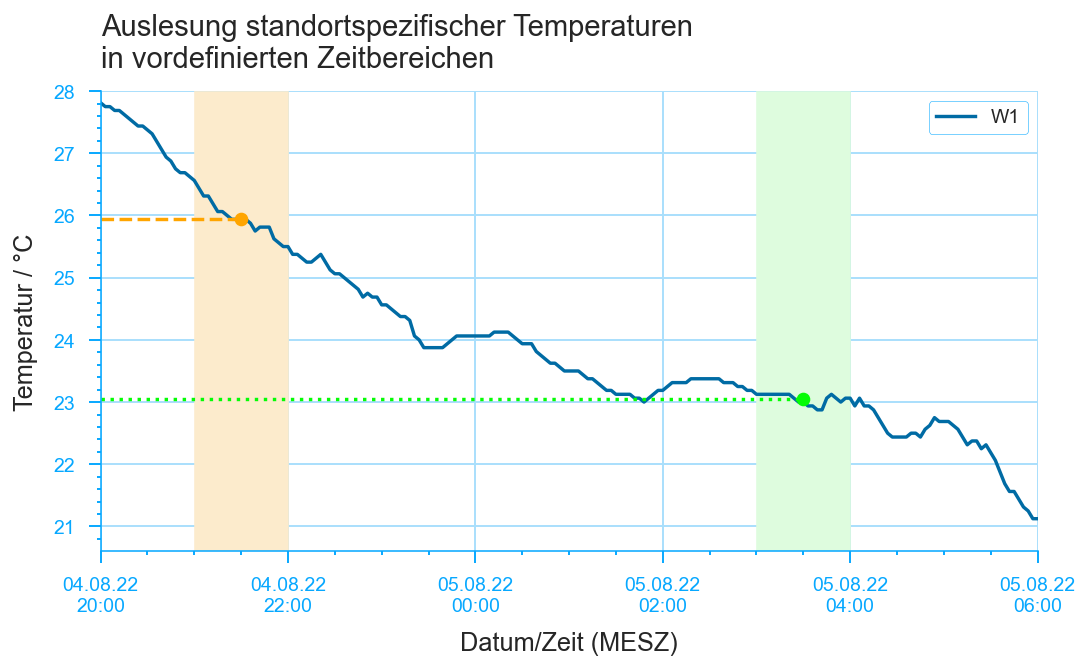

In [164]:
# Grafik 2: Auslesung standortspezifischer Temperaturen in vordefinierten Zeitbereichen

# xrange: 20-6 => 10h

mean_1 = inst.timeseries["W1"].loc[dt.datetime(2022,8,4,21):dt.datetime(2022,8,4,22), "T"].mean()
mean_2 = inst.timeseries["W1"].loc[dt.datetime(2022,8,5,3):dt.datetime(2022,8,5,4), "T"].mean()
print(mean_1, mean_2)

def annot_func_fig_2(fig, ax):
    plt.axvspan(
        xmin=dt.datetime(2022,8,4,21),
        xmax=dt.datetime(2022,8,4,22),
        color="#fcebcc",
        alpha=9.8
    )
    plt.axvspan(
        xmin=dt.datetime(2022,8,5,3),
        xmax=dt.datetime(2022,8,5,4),
        color="#defcde",
    )
    plt.axhline(mean_1, 0, 0.15, ls="--", c="#ffa500")
    plt.axhline(mean_2, 0, 0.75, ls=":",  c="#05fc05")
    
    ax.plot(dt.datetime(2022,8,4,21,30), mean_1, "o", c="#ffa500")
    ax.plot(dt.datetime(2022,8,5, 3,30), mean_2, "o", c="#05fc05")
    
    ax.set_xticks([
        dt.datetime(2022,8,4,20) + dt.timedelta(hours=i*2)
        for i in range(6)
    ])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y\n%H:%M'))

    return fig, ax


inst.plot_temp_time(
    sensor_type="wtdl",
    sensor_locations=(1,),
    title="Auslesung standortspezifischer Temperaturen\nin vordefinierten Zeitbereichen",
    fig_size=(8,5),
    xlim=(
        dt.datetime(2022,8,4,20),
        dt.datetime(2022,8,5,6),
    ),
    ylim=(20.6,28),
    annot_func=annot_func_fig_2,
    file_export_path="graphics_report",
    file_export=True,
    file_export_type=("pdf", "png",),
)

In [109]:
a = [1,2,3] + [5]

In [107]:
a.append(3)

In [110]:
a

[1, 2, 3, 5]